### Github repository: https://github.com/jmlarios/AI-MACHINE-LEARNING-FOUNDATIONS

In [164]:
import pandas as pd

In [165]:
df = pd.read_csv('hour.csv')

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [166]:
df['dteday'] = pd.to_datetime(df['dteday'])

## Data Loading and Initial Exploration

The assignment instructions mentioned the absence of missing values so there is no need to check this aspect of the dataset and therefore no filling or row deletion will be performed for this matter.

The following to check is the anomalies or outliers in the dataset. For this we will check the numerical variables, specifically 'hum' and 'windspeed' and see how they behave, if there are anormal values or patterns.

In [167]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


From the description above, we can see that both the 'hum' and 'windspeed' features have a maximum value of 1 or less, which shows a reaistic representation of the data. Of course the minimum would be 0 as there could be no humidity and/or wind. This means that we don't really have anomalies within these features and they appear to be within realistic bounds. For this we would not need to apply anything to deal with outliers.

#### Checking Skewness

The target variable cnt is skewed towards the right. This indicates a concentration of low rental counts with fewer high-rental peaks. 

I consulted with ChatGPT in order to see if perharps a normalization or standarization should be made to the target variable in order to ensure model performance and found out that this would be necessary for linear models as it told me the following: "To reduce skewness and improve modeling performance — particularly for linear models — a log transformation (log1p) can be applied. Tree-based models are robust to this skew, but transforming the target can still help stabilize variance and residuals."

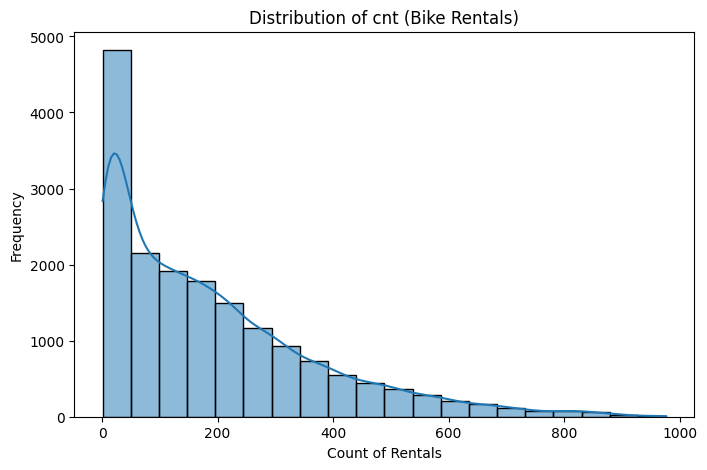

Skewness of cnt: 1.2773013463494975


In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

cnt_skew = skew(df['cnt'])
cnt_skew

plt.figure(figsize=(8,5))
sns.histplot(df['cnt'], bins=20, kde=True)
plt.title("Distribution of cnt (Bike Rentals)")
plt.xlabel("Count of Rentals")
plt.ylabel("Frequency")
plt.show() # Plotting the distribution of cnt

print("Skewness of cnt:", cnt_skew) # Checking skewness of cnt


Following the recommendation from before, a log transformation will be applied to the target variable which will be stored in a new column and will be used as the target only for the Linear Regression model.

In [169]:
import numpy as np
df['log_cnt'] = np.log1p(df['cnt']) # Applying log transformation to cnt


#### Checking Correlations/Collinearity

A correlation matrix was used to check the relationship between the target variable and the for now existing features. The results of the matrix and the dropped columns along with the reasoning falls below.

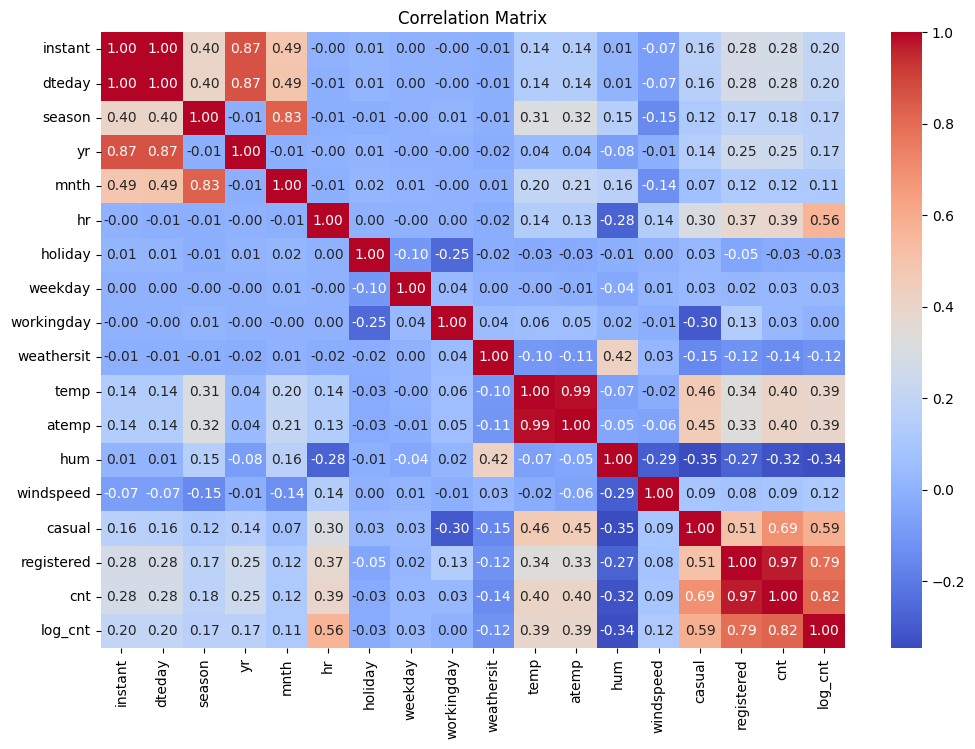

In [170]:
corr_matrix = df.corr() # Calculating the correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show() # Plotting the correlation matrix

In [171]:
# Compute correlations with cnt
correlations = df[['registered', 'casual', 'temp', 'atemp', 'hr', 'cnt']].corr()

# Display correlation values
print(correlations['cnt'].sort_values(ascending=False))


cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
Name: cnt, dtype: float64


The target variable 'cnt' has a high correlation with the features 'registered and 'casual', which means they are direct predictors of the target variable and therefore must be dropped to avoid data leakage.

We can also see a correlation of 0.83 between 'mnth' and 'season' which completely makes sense, but in my opinion they both make good predictors and they are not entirely redundant data so we will keep both in for now regardless of their moderate correlation.

From the correlation matrix we can also observe a correlation of 0.99 between 'temp' and 'atemp' and we really only need one of them, especially to avoid redundance since the data is very similar if not the same, therefore 'atemp' will be dropped as well.

Lastly, there is a high correlation between 'instant' and 'dteday'. The 'instant' column is just an index which is not needed and the 'dteday' column is already represented in the features 'yr', 'mnth', 'weekday' and 'hr', so once again redundant data that will be dropped.

The columns to be dropped then are 'instant', 'dteday', 'casual', 'registered' and 'atemp'.

In [172]:
#Dropping chosen features
df = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'atemp'])


For the rest of the features, the remaining weather features 'temp', 'hum', 'windspeed' and 'weathersit' seem like good potential features, for which we are choosing to keep them as part of the dataset. Since they represent the weather conditions, it would make sense for them to make good predictors as depending on the weather the customers could opt to rent or not a bike.

For the categorical features 'holiday' and 'workingday', they also make sense to be kept as they can as well make good predictors of if a bike rental occurs or not as there might be more rentals on a holiday than in a working day. The same happens with the 'season' feature as depending on the season of the year it could condition the amount of bike rentals that occur as well.

Regarding the temporal features 'yr', 'mnth', 'weekday' and 'hr', they influence in a similar way as the categorical features discussed just now. And then month and weekday especially could help as predictors, so we will keep all either way.

## Data Splitting

In [173]:
from sklearn.model_selection import train_test_split

# Target column for all models
target = 'cnt'

# Features (excluding log_cnt — that’s for linear only later)
X = df.drop(columns=['cnt', 'log_cnt'])  # keeping log_cnt for now, just not as input
y = df['cnt']

# Split: First split off test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split temp into train (60%) and val (20%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")


Train shape: (10427, 11), Validation shape: (3476, 11), Test shape: (3476, 11)


#### *After testing markdown*
The block of code below was used for splitting the data while maintaining the temporal order. nitially, I experimented with preserving temporal order during data splitting. However, this approach resulted in significantly worse model performance, including an R<sup>2</sup>: of -0.32 for the linear regression model, indicating the lack of generalizing ability from the model. The results were the following:

Linear Regression (Log Target) Validation Results:
MSE:  61400.54,
MAE:  161.62,
R<sup>2</sup>:   -0.3219

Random Forest Validation Results:
MSE:  11127.03,
MAE:  75.75,
R<sup>2</sup>:   0.7605

XGBoost Validation Results:
MSE:  8285.21,
MAE:  66.23,
R<sup>2</sup>:   0.8216

For this reason I considered it was best to keep the random splitting. This provided much better results and more accurate models, especially for the tree-based regression models like Random Forest and XGBoost.

In [174]:
# Chronological split (optional)
#train_size = int(len(df) * 0.6)
#val_size = int(len(df) * 0.2)

#X_train = X.iloc[:train_size]
#y_train = y.iloc[:train_size]

#X_val = X.iloc[train_size:train_size+val_size]
#y_val = y.iloc[train_size:train_size+val_size]

#X_test = X.iloc[train_size+val_size:]
#y_test = y.iloc[train_size+val_size:]


## Feature Engineering

#### Cyclical Encoding (Cyclical Features)

In [175]:
# Feature Engineering: Creating sine and cosine features for cyclical features
for df_ in [X_train, X_val, X_test]:
    df_['hr_sin'] = np.sin(2 * np.pi * df_['hr'] / 24)
    df_['hr_cos'] = np.cos(2 * np.pi * df_['hr'] / 24)
    df_['weekday_sin'] = np.sin(2 * np.pi * df_['weekday'] / 7)
    df_['weekday_cos'] = np.cos(2 * np.pi * df_['weekday'] / 7)

# Dropping original features after creating sine/cosine features
X_train.drop(columns=['hr', 'weekday'], inplace=True)
X_val.drop(columns=['hr', 'weekday'], inplace=True)
X_test.drop(columns=['hr', 'weekday'], inplace=True)


#### One-Hot Encoding (Categorical Features)

In [176]:
categorical_cols = ['season', 'weathersit', 'mnth']

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns to fix missing dummies (e.g., if val/test doesn't have all categories)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

#### Scaling (Continous Features)

In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cont_cols = ['temp', 'hum', 'windspeed']

X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])
X_val[cont_cols] = scaler.transform(X_val[cont_cols])
X_test[cont_cols] = scaler.transform(X_test[cont_cols])

## Linear Regression Model

In [178]:
# Use the log-transformed target
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

In [179]:
from sklearn.linear_model import LinearRegression

# Initialize and fit
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_log)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicting on validation set
y_val_pred_log = lr_model.predict(X_val)

# Inverse transform to get predictions in original scale
y_val_pred = np.expm1(y_val_pred_log)
y_val_actual = y_val  # already in original scale

# Evaluating
mse = mean_squared_error(y_val_actual, y_val_pred)
mae = mean_absolute_error(y_val_actual, y_val_pred)
r2 = r2_score(y_val_actual, y_val_pred)

print(f"Linear Regression (Log Target) Validation Results:")
print(f"MSE:  {mse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.4f}")


Linear Regression (Log Target) Validation Results:
MSE:  22354.63
MAE:  97.97
R²:   0.3125


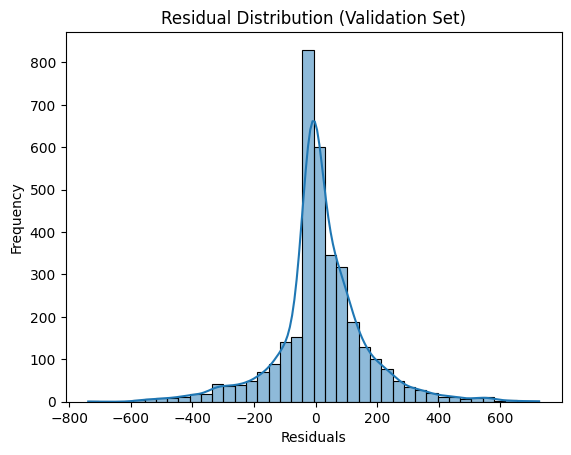

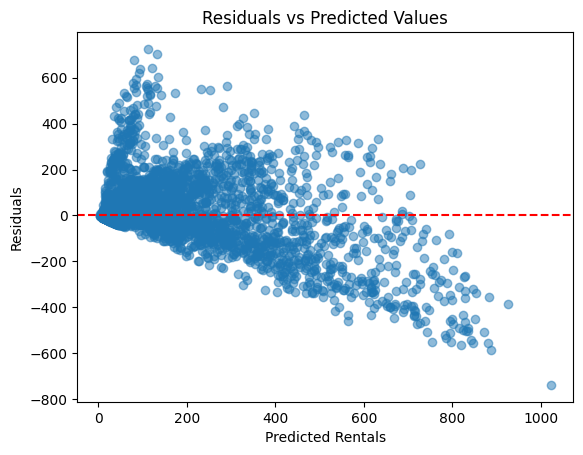

In [181]:
# Residuals
residuals = y_val_actual - y_val_pred

# Residual plot
sns.histplot(residuals, kde=True, bins=40)
plt.title("Residual Distribution (Validation Set)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Residuals vs Predicted
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Rentals")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


The Linear Regression model achieved an R<sup>2</sup> score of 0.3125 on the validation set, suggesting that it explains only a third of the variability in rental counts. This indicates a biased model that underfits the data, this is probably caused by the linearity assumption of the Linear Regression model and also the inability to capture  more complex nonlinear relationships that may be present in other features like hour, weather, and season.

Despite using a log transformation to stabilize the target distribution, the model still gives a high MAE and MSE which confirm that perhaps there is a need for more complex models that can achieve a better performance with this data.

There is also a chance to try increasing model performance, which will be attempted later (using an interaction term between 'temp' and 'hum' suggested by the guidelines), but the initial results lead to the question if there really is a way to better this result or its just how its gonna be since a linear model cant predict more complex relationships.

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit on original target (cnt)
rf_model.fit(X_train, y_train)

# Predicting on validation set
y_val_pred_rf = rf_model.predict(X_val)

# Evaluating
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_rf = mean_squared_error(y_val, y_val_pred_rf)
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
r2_rf = r2_score(y_val, y_val_pred_rf)

print("Random Forest Validation Results:")
print(f"MSE:  {mse_rf:.2f}")
print(f"MAE:  {mae_rf:.2f}")
print(f"R²:   {r2_rf:.4f}")


Random Forest Validation Results:
MSE:  1891.92
MAE:  26.63
R²:   0.9418


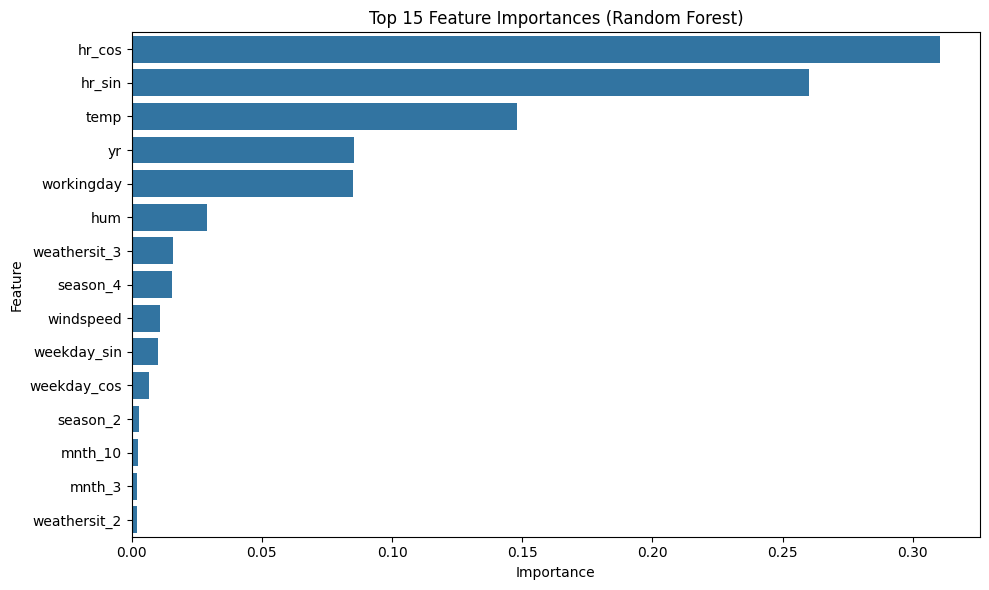

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = rf_model.feature_importances_
features = X_train.columns

# Build DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


The Random Forest Regressor significantly improved over the linear model, capturing non-linear interactions and complex patterns in the data. The model achieved an R<sup>2</sup> of 0.9418, which drastically improved compared to the baseline Linear Regression model.

The top 3 most important features showed to be 'hr_cos', 'hr_sin' and 'temp', as shown by the feature importance plot, highlighting the importance of temporal and environmental context. This model gives an already stronger result, which will most likely improve upon tuning.

## Gradient Boosting Regressor

In [ ]:
import xgboost as xgb

# Initialize model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)

# Predicting on validation
y_val_pred_xgb = xgb_model.predict(X_val)

# Evaluating
mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)
mae_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
r2_xgb = r2_score(y_val, y_val_pred_xgb)

print("XGBoost Validation Results:")
print(f"MSE:  {mse_xgb:.2f}")
print(f"MAE:  {mae_xgb:.2f}")
print(f"R²:   {r2_xgb:.4f}")


XGBoost Validation Results:
MSE:  1723.02
MAE:  26.08
R²:   0.9470


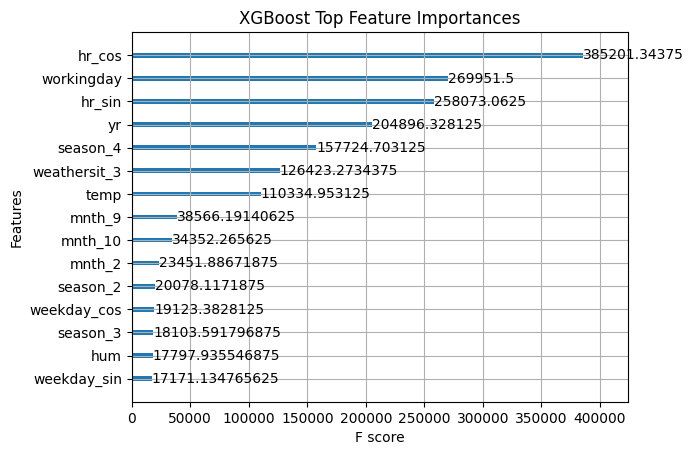

In [185]:
xgb.plot_importance(xgb_model, max_num_features=15, importance_type='gain')
plt.title("XGBoost Top Feature Importances")
plt.show()

XGBoost outperformed both Random Forest and Linear Regression, achieving an R<sup>2</sup> of 0.9470 and an MAE of 26.08 on the validation set. Just like with the Random Forest, this confirms its ability to model complex non-linear interactions and give us much better results than the first model, and some somewhat close to the second one. The improvements over Random Forest, while modest, suggest that XGBoost's mechanism has a stronger predictive and generalization ability.

From the feature importance plot, we can see that for XGBoost, the top 3 most important features were 'hr_cos', 'workingday' and 'hr_cos'. Giving us a similar top 3 features to the Random Forest model.

## Hyperparameter Tuning

#### Trying Interaction Term on Linear Regression

From the getgo, the interaction term between the 'temp' and 'hum' features seemed irrelevant. In the correlation matrix there wasn't a significant indication of these two features being importantn in the sense to have this interaction term included.

In [186]:
# Making copies of datasets to avoid modifying the main feature sets
X_train_lr = X_train.copy()
X_val_lr = X_val.copy()
X_test_lr = X_test.copy()

# Add interaction term only to these
X_train_lr['temp_hum'] = X_train_lr['temp'] * X_train_lr['hum']
X_val_lr['temp_hum'] = X_val_lr['temp'] * X_val_lr['hum']
X_test_lr['temp_hum'] = X_test_lr['temp'] * X_test_lr['hum']

In [187]:
from sklearn.linear_model import LinearRegression

# Initialize and fit
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_log)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicting on validation set
y_val_pred_log = lr_model.predict(X_val_lr)

# Inverse transform to get predictions in original scale
y_val_pred = np.expm1(y_val_pred_log)
y_val_actual = y_val  # already in original scale

# Evaluating
mse = mean_squared_error(y_val_actual, y_val_pred)
mae = mean_absolute_error(y_val_actual, y_val_pred)
r2 = r2_score(y_val_actual, y_val_pred)

print(f"Linear Regression (Log Target) Validation Results:")
print(f"MSE:  {mse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.4f}")


Linear Regression (Log Target) Validation Results:
MSE:  21812.88
MAE:  97.13
R²:   0.3292


Following the results on the Linear Regression model with the interaction term, it doesn't really affect the model significantly as the performance is still very weak. The thoughts previously stated then stay confirmed, and the 'temp' and 'hum' features were not really important as to make an interaction term just like the correlation matrix showed.

#### Random Forest Tuning

To improve upon the baseline Random Forest model, I performed hyperparameter tuning using RandomizedSearchCV with 5-fold cross-validation as asked in the assignment guidelines.

In [189]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Re-initialize base model
rf_base = RandomForestRegressor(random_state=42)

# Randomized Search CV
rf_search = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist,
    n_iter=25,
    cv=5,
    verbose=1,
    scoring='r2',
    n_jobs=-1
)

# Fit on training data
rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='r2', verbose=1)

In [190]:
# Best parameters
print("Best Random Forest Params:")
print(rf_search.best_params_)

# Predicting with best model
best_rf = rf_search.best_estimator_
y_val_pred_rf_tuned = best_rf.predict(X_val)

# Evaluating tuned model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_rf_tuned = mean_squared_error(y_val, y_val_pred_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_val, y_val_pred_rf_tuned)
r2_rf_tuned = r2_score(y_val, y_val_pred_rf_tuned)

print("Tuned Random Forest Validation Results:")
print(f"MSE:  {mse_rf_tuned:.2f}")
print(f"MAE:  {mae_rf_tuned:.2f}")
print(f"R²:   {r2_rf_tuned:.4f}")


Best Random Forest Params:
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Tuned Random Forest Validation Results:
MSE:  1888.25
MAE:  26.51
R²:   0.9419


##### Tuning Results

As seen in the results, the best hyperparameter combination found was:

Best Random Forest Params:
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}

About model performance, the tuned model did not significantly outperform the baseline Random Forest model, which already provided similar results. This suggests that the default parameters were already good for the dataset as the results are still good, although not much different.

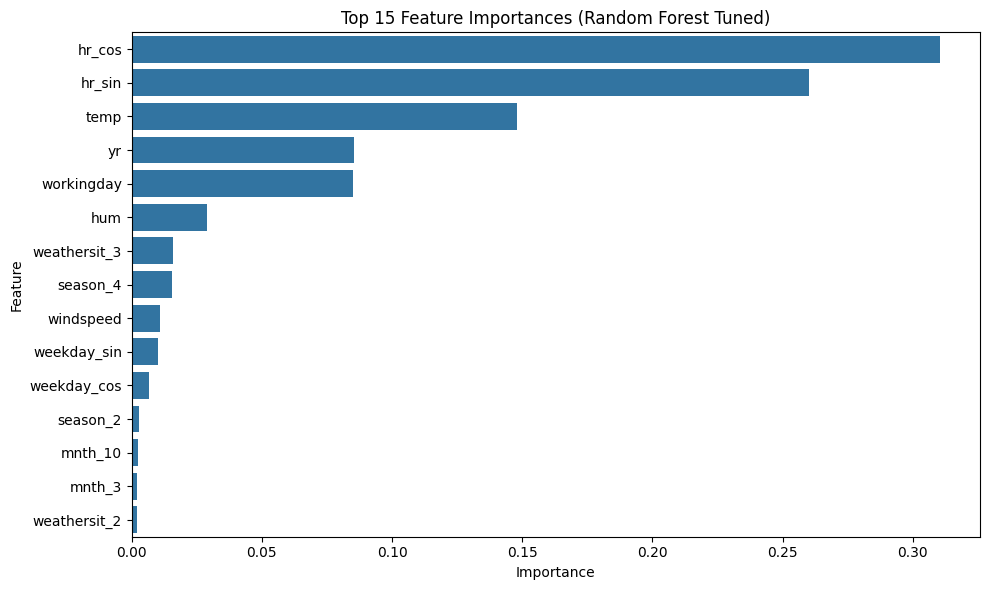

In [191]:
# Build DataFrame
feat_imp_tuned_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_tuned_df.head(15))
plt.title("Top 15 Feature Importances (Random Forest Tuned)")
plt.tight_layout()
plt.show()

About the feature importance plot, it is almost equal to the previous importance plot shown for the baseline Random Forest model, with hr_cos, hr_sin and temp having the most importance amongst all of the features.

#### XGBoost Tuning

To improve upon the baseline XGBoost model I used Bayesian Optimization as mentioned in the assignment guidelines.

In [192]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import xgboost as xgb

# Defining hyperparameter search space
xgb_search_space = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(3, 20),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0)
}

# Base model
xgb_base = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Bayesian Optimization
xgb_search = BayesSearchCV(
    estimator=xgb_base,
    search_spaces=xgb_search_space,
    n_iter=25,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit search
xgb_search.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
              n_iter=25, n_jobs=-1, random_state=42, scoring='r2',
              search_spaces={'learning_rate': Real(low=0.01, high=0.3, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=500, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')},
              verbose=1)

In [193]:
# Best hyperparameters
print("Best XGBoost Params:")
print(xgb_search.best_params_)

# Predicting with tuned model
best_xgb = xgb_search.best_estimator_
y_val_pred_xgb_tuned = best_xgb.predict(X_val)

# Evaluating tuned model
mse_xgb_tuned = mean_squared_error(y_val, y_val_pred_xgb_tuned)
mae_xgb_tuned = mean_absolute_error(y_val, y_val_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_val, y_val_pred_xgb_tuned)

print("Tuned XGBoost Validation Results:")
print(f"MSE:  {mse_xgb_tuned:.2f}")
print(f"MAE:  {mae_xgb_tuned:.2f}")
print(f"R²:   {r2_xgb_tuned:.4f}")


Best XGBoost Params:
OrderedDict({'learning_rate': 0.15849201309311142, 'max_depth': 6, 'n_estimators': 339, 'subsample': 0.9013823905781553})
Tuned XGBoost Validation Results:
MSE:  1606.77
MAE:  25.04
R²:   0.9506


### Tuning Results

The tuned XGBoost model outperformed Random Forest on all metrics, achieving an R<sup>2</sup> of 0.9506 and an MAE of 25.04. These results confirm that XGBoost’s gradient boosting can better capture the nonlinear relationships present in the data and generalize more effectively compared to Random Forest. 

The tuned model managed to improve the baseline XGBoost as well going from an R<sup>2</sup> of 0.9470 to 0.9506. While it still is a subtle improvement, the tuned model does manage to explain and generalize the data better than the baseline model.

The best hyperparameters were the following:

Best XGBoost Params:
{'learning_rate': 0.15849201309311142, 'max_depth': 6, 'n_estimators': 339, 'subsample': 0.9013823905781553}

## Iterative Evaluation and Refinement

For this task the refinement and iterations were performed on the code already, and some of the results reported as part of the markdowns. 

The interaction term between 'temp' and 'hum' was tried on the LR model first. As reported before the results were not notorious. For the tree based models, it was also tried, and for both models the approach resulted in the same as it did in the Linear Regression model, subtle improvement but still not relevant. I decided to not use it for the tree based models since when I ran the tuning with the interaction term the results were slightly worse than when I ran the tuning without it.

Regarding the EDA, we said before that based on the values of the numerical variables, outliers were not really identified, therefore nothing was done regarding this.

As for feature selection, I tried dropping certain features. The first thought I had was to drop 'mnth' as it had a high correlation with 'season' and I thought perhaps this could improve the model, along with 'mnth' I dropped 'yr' as I didnt think  it necessarily had that much importance, even though it was one of the Random Forest's best features. The outcome for this attempt to better performance was not benefitial, as performance went down for both tree based models, not even passing the 0.9 threshold for R<sup>2</sup>, therefore I just continued with the initial tuning done.

## Final Model Selection and Testing

The chosen model for final selection was XGBoost, as the tuned model was superior than all the rest. Below is the training on the combined dataset and analysis.

In [194]:
# Combining train + val
X_final = pd.concat([X_train, X_val])
y_final = pd.concat([y_train, y_val])

In [195]:
# Use best params from BayesSearchCV
final_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=339,
    max_depth=6,
    learning_rate=0.15849201309311142,
    subsample=0.9013823905781553,
    random_state=42,
    n_jobs=-1
)

final_xgb.fit(X_final, y_final)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15849201309311142,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=339, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predicting on test set
y_test_pred = final_xgb.predict(X_test)

# Evaluating test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Final XGBoost Test Set Results:")
print(f"MSE:  {mse_test:.2f}")
print(f"MAE:  {mae_test:.2f}")
print(f"R²:   {r2_test:.4f}")


Final XGBoost Test Set Results:
MSE:  1468.96
MAE:  23.64
R²:   0.9536


After evaluating multiple models, the tuned XGBoost regressor was the best performer. After training on the combined training and validation data, it achieved an R<sup>2</sup> of 0.9536, with a mean absolute error (MAE) of just 23.64 rentals. These results indicate really good generalization capacity and confirm that the model can reliably predict hourly bike rental demand based solely on weather and temporal features. The consistent performance across validation and test sets also suggests that the model is neither overfitting nor underfitting, therefore providing a strong bias-variance balance.